# DATA

In [860]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [861]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data.resample('5min').mean()
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna() 
CO_Data.shape

(45117, 9)

In [862]:
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()

In [863]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse

def sMAE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    smae=np.mean(abs(true-pred)/((abs(true)+abs(pred))/2))
    return smae

In [864]:
def sMAE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    #((abs(true)+abs(pred))/2)
    smae=sum(abs(true-pred))/len(true)
    mae=smae/np.mean(true)
    return mae

In [865]:
A=np.array([3,1])
B=np.array([1,3])
C=[]
for i in range(2):
    C.append(max(A[i],B[i]))
C

[3, 3]

In [866]:
def sMAE(true,pred):
    pred=np.array(pred)
    true=np.array(true)
    smae=abs(np.mean(true-pred))/np.mean(true)
    return smae

In [867]:
from scipy.stats import chi2
p = np.array([ 0.9])
df=np.array(range(1,10000))
chi = [0]+list(chi2.isf(p, df))

In [868]:
def precision(pred,true):
    pred=list(pred)
    true=list(true)
    for i in range(len(true)):
        if true[i]==0:
            true.pop(i)
            pred.pop(i)
    pred=np.array(pred)
    true=np.array(true)
    d=((pred-true)/true)*100
    n=len(pred)
    A=np.sqrt((n-1)/chi[n-1])
    cv=np.sqrt(((n*sum(d**2)-(sum(d))**2)/(n*(n-1))))*A
    return cv

In [869]:
def bias(pred,true):
    pred=np.array(pred)
    true=np.array(true)
    bias=abs(np.mean(pred-true)/np.mean(true))*100
    return bias  

In [870]:
def precision(pred):
    pred=np.array(pred)
    prec=(np.std(pred)/np.mean(pred))*100
    return prec  

In [871]:
def precision(pred):
    pred=np.array(pred)
    std=np.sqrt((1/(len(pred)-1))*sum((pred-np.mean(pred))**2))
    prec=(std/np.mean(pred))*100
    return prec  

In [884]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)


In [885]:
X=CO_Data[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=CO_Data['Ref']

In [920]:
S=np.array(CO_Data['Net Signal'].to_list())
T=np.array(CO_Data['Temp'].to_list())
R=np.array(CO_Data['RH'].to_list())
S2=S**2
X['S2']=S2
T2=S**2
X['T2']=T2
R2=R**2
X['R2']=R2
ST=S*T
X['ST']=ST
SR=S*R
X['SR']=SR
TR=T*R
X['TR']=TR


In [921]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [922]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10)
model=clf.fit(X_train,y_train)

In [923]:
pred=model.predict(X_train)

In [924]:
resid=y_train-pred

In [925]:
Pred1=model.predict(X_test)

In [926]:
regressor.fit(X_train, resid)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000,
                      random_state=0)

In [927]:
Pred2=regressor.predict(X_test)
Pred=np.array(Pred1)+np.array(Pred2)
Pred[50]

702.896278475004

In [928]:
y_test[50]

526.2030444444445

In [929]:
rmse=round(sm.r2_score(y_test, Pred), 2)
rmse

0.54

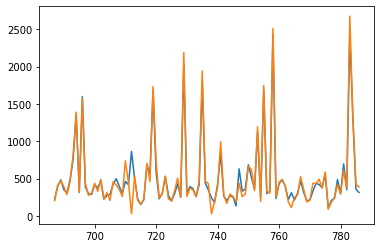

In [634]:
ind=[i for i in range(len(pred))]
plt.plot(ind[687:],pred[687:])
plt.plot(ind[687:],y_test[687:])

In [690]:
df=(np.array(pred)-np.array(y_test))

In [691]:
df=list(df)
df.pop(92)
df.pop(522)
df.pop(571)
df.pop(624)
df.pop(712)
df.pop(738)
len(df)

781

In [692]:
np.std(df)/np.mean(y_test)

0.2203520377911703

In [689]:
np.std(pred)

396.08861663128744

In [607]:
d=((np.array(pred)-np.array(y_test))/np.array(y_test))*100
np.std(d)

99.6690443496704

In [585]:
d=((pred-y_test)/y_test)*100
sum(d)**2

229229633.22835344

In [586]:
min(y_test)

3.6802442833333338

In [587]:
df1=[x for _, x in CO_Data.groupby('Month')]
data_oct=df1[4]
data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]
data_apr.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-14 02:00:00,91.072497,10.818385,66.206200,147.708633,35.862141,4.0,1.0,14.0,2.0
2020-04-12 00:00:00,155.283670,12.275689,86.700452,186.931663,62.845959,4.0,6.0,12.0,0.0
2020-04-18 04:00:00,133.612118,14.429239,56.840618,160.642314,47.917081,4.0,5.0,18.0,4.0
2020-04-16 17:00:00,300.525425,21.663770,54.675162,208.316181,85.005125,4.0,3.0,16.0,17.0
2020-04-20 21:00:00,236.277919,16.588971,75.550111,178.326894,85.822821,4.0,0.0,20.0,21.0


In [588]:
data_Oct=data_oct.resample('h').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('h').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('h').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('h').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('h').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('h').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('h').mean()
data_Apr=data_Apr.dropna()

In [589]:
Data_Oct=data_oct.resample('6h').mean()
Data_Oct=Data_Oct.dropna()
Data_Nov=data_nov.resample('6h').mean()
Data_Nov=Data_Nov.dropna()
Data_Dec=data_dec.resample('6h').mean()
Data_Dec=Data_Dec.dropna()
Data_Jan=data_jan.resample('6h').mean()
Data_Jan=Data_Jan.dropna()
Data_Feb=data_feb.resample('6h').mean()
Data_Feb=Data_Feb.dropna()
Data_Mar=data_mar.resample('6h').mean()
Data_Mar=Data_Mar.dropna()
Data_Apr=data_apr.resample('6h').mean()
Data_Apr=Data_Apr.dropna()

# Mothly schemes

# Oct 2019

In [590]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [608]:
#,'Month','Day_of_week','Day','Hour'
X=data_oct[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_oct['Ref']
X=data_Oct[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Oct['Ref']
X_Train=X[:X.shape[0]-60]
X_Test=X[X.shape[0]-60:]
y_Train=y[:X.shape[0]-60]
y_Test=y[X.shape[0]-60:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.001)
X_test=X_Test
y_test=y_Test
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum1=sum(A[:100])
mean1=np.std(y)/np.mean(y)
X.shape

(595, 7)

Text(0.5, 1.0, 'CO')

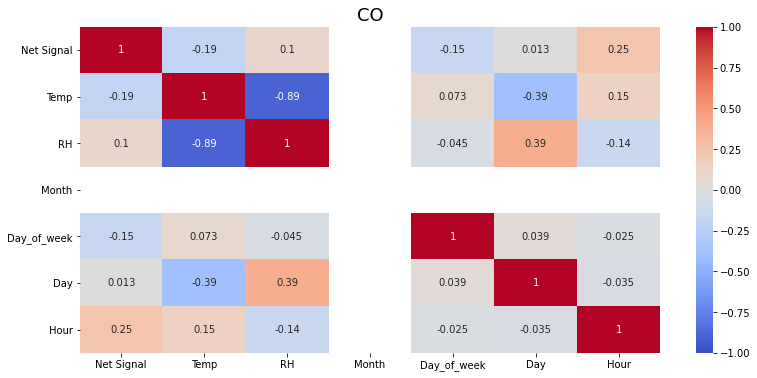

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(X.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

In [610]:
def relative_mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

# RF

In [611]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)


In [695]:
Day=[i for i in np.arange(1,21,0.5) ]
Rmse1_rf=[]
RMSE1_rf=[]
for i in range(1,41):
    regressor.fit(X[:12*i], y[:12*i])
    pred=regressor.predict(X[12*i:])
    rmse=round(sm.r2_score(y[12*i:], pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(precision(pred),2)
    Rmse1_rf.append(mse)
    RMSE1_rf.append(rmse)

In [696]:
 RMSE1_rf

[-0.2,
 -0.13,
 0.38,
 0.28,
 0.39,
 0.31,
 0.4,
 0.35,
 0.43,
 0.4,
 0.44,
 0.43,
 0.43,
 0.54,
 0.64,
 0.67,
 0.66,
 0.66,
 0.67,
 0.67,
 0.66,
 0.68,
 0.7,
 0.71,
 0.71,
 0.71,
 0.71,
 0.7,
 0.71,
 0.71,
 0.72,
 0.78,
 0.78,
 0.77,
 0.78,
 0.77,
 0.78,
 0.79,
 0.79,
 0.79]

In [435]:
from scipy.signal import savgol_filter
yhat1 = savgol_filter(Rmse1_rf, 11, 3)

In [436]:
yhat1

array([0.39377622, 0.28405594, 0.21508159, 0.17912587, 0.16846154,
       0.17536131, 0.18482517, 0.21144522, 0.20410256, 0.2339627 ,
       0.22589744, 0.21881119, 0.18300699, 0.15706294, 0.11752914,
       0.10298368, 0.0827972 , 0.07414918, 0.07470862, 0.08638695,
       0.07981352, 0.06750583, 0.05048951, 0.05177156, 0.0602331 ,
       0.06713287, 0.06794872, 0.06228438, 0.0660373 , 0.06974359,
       0.072331  , 0.07067599, 0.06459207, 0.0667366 , 0.08244755,
       0.08340326, 0.08938228, 0.10407925, 0.13118881, 0.17440559])

In [437]:
len(y[480:])

115

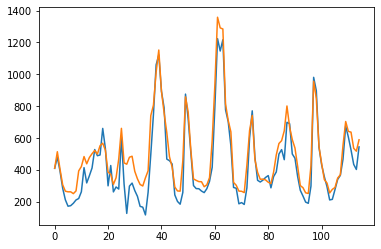

In [438]:
ind=[i for i in range(115)]
plt.plot(ind,y[480:])
plt.plot(ind,pred)

# XGBoost

from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

Rmse1_ann=[]
RMSE1_ann=[]
for i in range(1,11):
    model.fit(X_train[:48*i], y_train[:48*i])
    pred=model.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #mse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse1_ann.append(mse)
    RMSE1_ann.append(rmse)


# Nov 2019

   #   RF

In [439]:
X=data_nov[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_nov['Ref']
X=data_Nov[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Nov['Ref']
X_Train=X[:X.shape[0]-60]
X_Test=X[X.shape[0]-60:]
y_Train=y[:X.shape[0]-60]
y_Test=y[X.shape[0]-60:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.001)
X_test=X_Test
y_test=y_Test
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum2=sum(A[:100])
mean2=np.std(y)/np.mean(y)
Rmse2_rf=[]
RMSE2_rf=[]
for i in range(1,41):
    regressor.fit(X[:12*i], y[:12*i])
    pred=regressor.predict(X[12*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y[12*i:], pred),2)
    rmse=round(sm.r2_score(y[12*i:], pred), 2)
    Rmse2_rf.append(mse)
    RMSE2_rf.append(rmse)

In [441]:
yhat2 = savgol_filter(Rmse2_rf, 11, 3)
yhat2

array([0.29356643, 0.27188811, 0.24221445, 0.20740093, 0.17030303,
       0.13377622, 0.10717949, 0.07778555, 0.06643357, 0.04491841,
       0.02738928, 0.02839161, 0.02722611, 0.03132867, 0.03825175,
       0.03689977, 0.03538462, 0.03034965, 0.02671329, 0.0239627 ,
       0.02871795, 0.04678322, 0.06247086, 0.07783217, 0.08123543,
       0.08158508, 0.08242424, 0.08282051, 0.072331  , 0.07095571,
       0.07468531, 0.07876457, 0.07799534, 0.07363636, 0.06214452,
       0.05801865, 0.0532634 , 0.04713287, 0.03888112, 0.02776224])

# XGBoost

Rmse2_ann=[]
RMSE2_ann=[]
for i in range(1,11):
    model.fit(X_train[:48*i], y_train[:48*i])
    pred=model.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse2_ann.append(mse)
    RMSE2_ann.append(rmse)

# Dec 2019

# RF

In [442]:
X=data_dec[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_dec['Ref']
X=data_Dec[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Dec['Ref']
X_Train=X[:X.shape[0]-60]
X_Test=X[X.shape[0]-60:]
y_Train=y[:X.shape[0]-60]
y_Test=y[X.shape[0]-60:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.001)
X_test=X_Test
y_test=y_Test

A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum3=sum(A[:100])
mean3=np.std(y)/np.mean(y)
Rmse3_rf=[]
RMSE3_rf=[]
for i in range(1,41):
    regressor.fit(X[:12*i], y[:12*i])
    pred=regressor.predict(X[12*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y[12*i:], pred),2)
    rmse=round(sm.r2_score(y[12*i:], pred), 2)
    Rmse3_rf.append(mse)
    RMSE3_rf.append(rmse)


In [443]:
yhat3= savgol_filter(Rmse3_rf, 11, 3)
yhat3

array([0.2434965 , 0.23006993, 0.20020979, 0.15970862, 0.11435897,
       0.06995338, 0.03377622, 0.0102331 , 0.02904429, 0.0286014 ,
       0.03128205, 0.03484848, 0.03230769, 0.01969697, 0.02230769,
       0.02536131, 0.02948718, 0.02794872, 0.03235431, 0.03011655,
       0.02524476, 0.02864802, 0.02659674, 0.01167832, 0.02825175,
       0.04477855, 0.06053613, 0.06391608, 0.06899767, 0.06095571,
       0.05655012, 0.06384615, 0.06540793, 0.054662  , 0.07146853,
       0.08417249, 0.09784382, 0.11156177, 0.12440559, 0.13545455])

# XGBoost

Rmse3_ann=[]
RMSE3_ann=[]
for i in range(1,11):
    model.fit(X_train[:48*i], y_train[:48*i])
    pred=model.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    mse= mape=round(relative_mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse3_ann.append(mse)
    RMSE3_ann.append(rmse)

# Jan 2020 

# RF

In [446]:
from sklearn.metrics import mean_absolute_error
X=data_jan[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_jan['Ref']
X=data_Jan[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Jan['Ref']
X_Train=X[:X.shape[0]-60]
X_Test=X[X.shape[0]-60:]
y_Train=y[:X.shape[0]-60]
y_Test=y[X.shape[0]-60:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.001)
X_test=X_Test
y_test=y_Test
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum4=sum(A[:100])
mean4=np.std(y)/np.mean(y)
Rmse4_rf=[]
RMSE4_rf=[]
for i in range(1,41):
    regressor.fit(X[:12*i], y[:12*i])
    pred=regressor.predict(X[12*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #mse= mape=round(mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y[12*i:], pred),2)
    rmse=round(sm.r2_score(y[12*i:], pred), 2)
    Rmse4_rf.append(mse)
    RMSE4_rf.append(rmse)
    


In [447]:
#yhat4 = savgol_filter(Rmse4_rf, 11, 3)
yhat4

array([0.01048951, 0.06937063, 0.11      , 0.13588578, 0.15053613,
       0.15745921, 0.15785548, 0.17979021, 0.1865035 , 0.18888112,
       0.21314685, 0.22972028, 0.23065268, 0.22179487, 0.19797203,
       0.16044289, 0.14321678, 0.14678322, 0.14389277, 0.13606061,
       0.14470862, 0.12680653, 0.09361305, 0.07037296, 0.05016317,
       0.03916084, 0.05370629, 0.06909091, 0.07531469, 0.08128205,
       0.08298368, 0.06895105, 0.06895105, 0.05890443, 0.06282051,
       0.07629371, 0.08842657, 0.09498834, 0.09174825, 0.07447552])

# XGBoost

Rmse4_ann=[]
RMSE4_ann=[]
for i in range(1,11):
    model.fit(X_train[:48*i], y_train[:48*i])
    pred=model.predict(X_test)
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse4_ann.append(mse)
    RMSE4_ann.append(rmse)

# Feb 2020

# RF

X=data_feb[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_feb['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum5=sum(A[:100])
mean5=np.std(y)/np.mean(y)
Rmse5_rf=[]
RMSE5_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse5_rf.append(mse)
    RMSE5_rf.append(rmse)

A=y.to_list()
Ext_feb=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_feb.append(i)
N_Ext_feb=len(Ext_feb)
N_Ext_feb

mean_feb=np.mean(y)
N_feb=y.shape[0]
Mean_Rmse_feb=np.mean(Rmse5_rf)

# XGBoost

Rmse5_ann=[]
RMSE5_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]

    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse5_ann.append(mse)
    RMSE5_ann.append(rmse)

# March 2020

# RF

In [614]:
data_Mar=data_Mar[(data_Mar[data_Mar.columns] <=1000).all(axis=1)]
X=data_Mar[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Mar['Ref']
X_Train=X[:X.shape[0]-60]
X_Test=X[X.shape[0]-60:]
y_Train=y[:X.shape[0]-60]
y_Test=y[X.shape[0]-60:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.002)
X_test=X_Test
y_test=y_Test
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum6=sum(A[:100])
mean6=np.std(y)/np.mean(y)
Rmse6_rf=[]
RMSE6_rf=[]
for i in range(1,41):
    regressor.fit(X[:12*i], y[:12*i])
    pred=regressor.predict(X[12*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(sMAE(y[12*i:], pred),2)
    rmse=round(sm.r2_score(y[12*i:], pred), 2)
    mse=round(precision(pred,y[12*i:]),2)
    Rmse6_rf.append(mse)
    RMSE6_rf.append(rmse)

In [615]:
Rmse6_rf

[35.19,
 19.9,
 6.94,
 2.81,
 5.51,
 8.96,
 0.43,
 18.53,
 32.46,
 18.21,
 11.31,
 14.46,
 3.99,
 2.78,
 6.25,
 14.91,
 14.19,
 13.91,
 13.43,
 7.73,
 6.69,
 6.97,
 10.97,
 24.46,
 20.3,
 13.97,
 8.46,
 7.65,
 22.88,
 8.51,
 9.28,
 16.3,
 29.4,
 17.73,
 50.83,
 36.39,
 21.88,
 17.11,
 15.32,
 7.87]

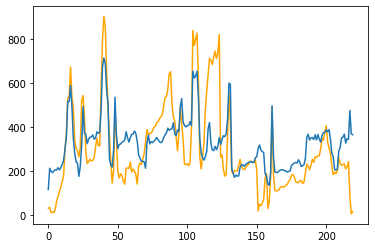

In [574]:
ind=[i for i in range(220)]
plt.plot(ind,y[480:], color='orange')
plt.plot(ind,pred)

In [327]:
pred[100]

405.69078442616296

In [451]:
yhat5 = savgol_filter(Rmse6_rf, 11, 3)
yhat=(yhat1+yhat2+yhat3+yhat4+yhat5)/5

# XGBoost

Rmse6_ann=[]
RMSE6_ann=[]
for i in range(1,11):
    model.fit(X_train[:48*i], y_train[:48*i])
    pred=model.predict(X)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y, pred), 2)
    Rmse6_ann.append(mse)
    RMSE6_ann.append(rmse)

# April 2020

# RF

X=data_apr[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_apr['Ref']
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum7=sum(A[:100])
mean7=np.std(y)/np.mean(y)
Rmse10_rf=[]
RMSE10_rf=[]
for i in range(1,11):
    regressor.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=regressor.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse10_rf.append(mse)
    RMSE10_rf.append(rmse)

A=y.to_list()
Ext_apr=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_apr.append(i)
N_Ext_apr=len(Ext_apr)
N_Ext_apr

# XGBoost

Rmse10_ann=[]
RMSE10_ann=[]
for i in range(1,11):
    model.fit(X[:576*i].drop(['Lab1'], axis=1), y[:576*i])
    pred=model.predict(X[576*i:].drop(['Lab1'], axis=1))
    y_test=y[576*i:]
    mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    Rmse10_ann.append(mse)
    RMSE10_ann.append(rmse)

mean_apr=np.mean(y)
N_apr=y.shape[0]
Mean_Rmse_apr=np.mean(Rmse10_rf)

Mean_Rmse=[Mean_Rmse_oct,Mean_Rmse_nov,Mean_Rmse_dec,Mean_Rmse_jan,Mean_Rmse_feb,Mean_Rmse_mar,Mean_Rmse_apr]
Mean_conc=[mean_oct,mean_nov,mean_dec,mean_jan,mean_feb,mean_mar,mean_apr]
N=[N_oct,N_nov,N_dec,N_jan,N_feb,N_mar,N_apr]
N_Ext=[N_Ext_oct,N_Ext_nov,N_Ext_dec,N_Ext_jan,N_Ext_feb,N_Ext_mar,N_Ext_apr]

Rmse=[]
for i in range(10):
    A=[Rmse1_rf[i],Rmse2_rf[i],Rmse3_rf[i],Rmse4_rf[i],Rmse5_rf[i],Rmse6_rf[i],Rmse10_rf[i]]
    Rmse.append(A)
RMSE=Rmse[0]+Rmse[1]+Rmse[2]+Rmse[3]+Rmse[4]+Rmse[5]+Rmse[6]+Rmse[7]
Conc=Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc
N_dp=N+N+N+N+N+N+N+N
N_ext=N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext

[<matplotlib.lines.Line2D object at 0x12c002340>, <matplotlib.lines.Line2D object at 0x11b560f40>, <matplotlib.lines.Line2D object at 0x12c6c0280>, <matplotlib.lines.Line2D object at 0x12c002460>]


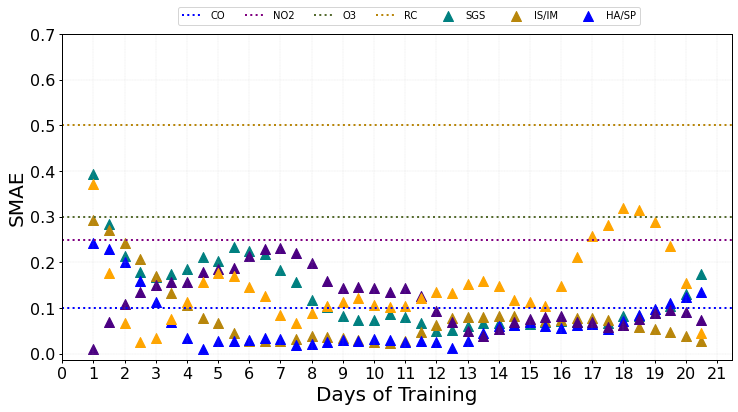

In [452]:
fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.4)

#plt.plot(Day,Rmse1_rf, color='orange',linewidth=3,marker="*",markersize=0,alpha=0.7)
#plt.plot(Day,yhat, color='teal',linewidth=3,marker="*",markersize=0,alpha=0.7)
plt.scatter(Day,yhat1, color='teal',s=100, marker="^")
plt.scatter(Day,yhat2, color='darkgoldenrod',s=100, marker="^")
plt.scatter(Day,yhat3, color='blue',s=100, marker="^")
plt.scatter(Day,yhat4, color='indigo',s=100, marker="^")
plt.scatter(Day,yhat5, color='orange',s=100, marker="^")
#plt.plot(NO2_Day,NO2_Rmse1_rf, color='teal',linewidth=3,marker="*",markersize=0,alpha=0.7)
#plt.scatter(NO2_Day,NO2_Rmse1_rf,label='NO2'.translate(subscript), color='teal',s=100, marker="^")
#plt.plot(SO2_Day,SO2_Rmse1_rf, color='rebeccapurple',linewidth=2,marker=".",markersize=0)
#plt.scatter(SO2_Day,SO2_Rmse1_rf, color='rebeccapurple',s=500, marker="*")
#plt.plot(O3_Day,O3_Rmse1_rf, color='firebrick',linewidth=3,marker=".",markersize=0,alpha=0.7)
#plt.scatter(O3_Day,O3_Rmse1_rf,label='O3'.translate(subscript), color='firebrick',s=100, marker="^")
plt.axhline(y = 0.1, color = 'blue',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y = 0.25, color ='purple',label='SGS' , linestyle = ':',linewidth=2)
plt.axhline(y = 0.3, color ='darkolivegreen',label='IS/IM' , linestyle = ':',linewidth=2)
plt.axhline(y = 0.5, color ='darkgoldenrod' ,label='HA/SP', linestyle = ':',linewidth=2)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
#specify order of items in legend
order = [4,5,6,0,1,2,3]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,ncol=7, 
           #bbox_to_anchor = (0.87,1.13)) 
plt.legend(['CO','NO2',
            'O3',"RC","SGS","IS/IM","HA/SP"],ncol=7,bbox_to_anchor = (0.87,1.10),  fontsize=10)

plt.xlabel('Days of Training',fontsize=20)
plt.ylabel('SMAE',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0, 22, step=1))
plt.yticks(np.arange(0,0.8, step=0.1)) 
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["top"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
#plt.legend( fontsize=16)
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.15)

In [453]:
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np
Day_1_rf=[RMSE1_rf[0],RMSE2_rf[0],RMSE3_rf[0],RMSE4_rf[0],RMSE6_rf[0]]
Day_2_rf=[RMSE1_rf[1],RMSE2_rf[1],RMSE3_rf[1],RMSE4_rf[1],RMSE6_rf[1]]
Day_3_rf=[RMSE1_rf[2],RMSE2_rf[2],RMSE3_rf[2],RMSE4_rf[2],RMSE6_rf[2]]
Day_4_rf=[RMSE1_rf[3],RMSE2_rf[3],RMSE3_rf[3],RMSE4_rf[3],RMSE6_rf[3]]
Day_5_rf=[RMSE1_rf[4],RMSE2_rf[4],RMSE3_rf[4],RMSE4_rf[4],RMSE6_rf[4]]
Day_6_rf=[RMSE1_rf[5],RMSE2_rf[5],RMSE3_rf[5],RMSE4_rf[5],RMSE6_rf[5]]
Day_7_rf=[RMSE1_rf[6],RMSE2_rf[6],RMSE3_rf[6],RMSE4_rf[6],RMSE6_rf[6]]
Day_8_rf=[RMSE1_rf[7],RMSE2_rf[7],RMSE3_rf[7],RMSE4_rf[7],RMSE6_rf[7]]
Day_9_rf=[RMSE1_rf[8],RMSE2_rf[8],RMSE3_rf[8],RMSE4_rf[8],RMSE6_rf[8]]
Day_10_rf=[RMSE1_rf[9],RMSE2_rf[9],RMSE3_rf[9],RMSE4_rf[9],RMSE6_rf[9]]




Day_1_ann=[RMSE1_ann[0],RMSE2_ann[0],RMSE3_ann[0],RMSE4_ann[0],RMSE6_ann[0]]
Day_2_ann=[RMSE1_ann[1],RMSE2_ann[1],RMSE3_ann[1],RMSE4_ann[1],RMSE6_ann[1]]
Day_3_ann=[RMSE1_ann[2],RMSE2_ann[2],RMSE3_ann[2],RMSE4_ann[2],RMSE6_ann[2]]
Day_4_ann=[RMSE1_ann[3],RMSE2_ann[3],RMSE3_ann[3],RMSE4_ann[3],RMSE6_ann[3]]
Day_5_ann=[RMSE1_ann[4],RMSE2_ann[4],RMSE3_ann[4],RMSE4_ann[4],RMSE6_ann[4]]
Day_6_ann=[RMSE1_ann[5],RMSE2_ann[5],RMSE3_ann[5],RMSE4_ann[5],RMSE6_ann[5]]
Day_7_ann=[RMSE1_ann[6],RMSE2_ann[6],RMSE3_ann[6],RMSE4_ann[6],RMSE6_ann[6]]
Day_8_ann=[RMSE1_ann[7],RMSE2_ann[7],RMSE3_ann[7],RMSE4_ann[7],RMSE6_ann[7]]
Day_9_ann=[RMSE1_ann[8],RMSE2_ann[8],RMSE3_ann[8],RMSE4_ann[8],RMSE6_ann[8]]
Day_10_ann=[RMSE1_ann[9],RMSE2_ann[9],RMSE3_ann[9],RMSE4_ann[9],RMSE6_ann[9]]

In [454]:
Day_1_RF=[Rmse1_rf[0],Rmse2_rf[0],Rmse3_rf[0],Rmse4_rf[0],Rmse6_rf[0]]
Day_2_RF=[Rmse1_rf[1],Rmse2_rf[1],Rmse3_rf[1],Rmse4_rf[1],Rmse6_rf[1]]
Day_3_RF=[Rmse1_rf[2],Rmse2_rf[2],Rmse3_rf[2],Rmse4_rf[2],Rmse6_rf[2]]
Day_4_RF=[Rmse1_rf[3],Rmse2_rf[3],Rmse3_rf[3],Rmse4_rf[3],Rmse6_rf[3]]
Day_5_RF=[Rmse1_rf[4],Rmse2_rf[4],Rmse3_rf[4],Rmse4_rf[4],Rmse6_rf[4]]
Day_6_RF=[Rmse1_rf[5],Rmse2_rf[5],Rmse3_rf[5],Rmse4_rf[5],Rmse6_rf[5]]
Day_7_RF=[Rmse1_rf[6],Rmse2_rf[6],Rmse3_rf[6],Rmse4_rf[6],Rmse6_rf[6]]
Day_8_RF=[Rmse1_rf[7],Rmse2_rf[7],Rmse3_rf[7],Rmse4_rf[7],Rmse6_rf[7]]
Day_9_RF=[Rmse1_rf[8],Rmse2_rf[8],Rmse3_rf[8],Rmse4_rf[8],Rmse6_rf[8]]
Day_10_RF=[Rmse1_rf[9],Rmse2_rf[9],Rmse3_rf[9],Rmse4_rf[9],Rmse6_rf[9]]

In [535]:
Mean=(np.array(Rmse1_rf)+np.array(Rmse2_rf)+np.array(Rmse3_rf)+np.array(Rmse4_rf)+np.array(Rmse6_rf))/5
Mean=list(Mean)+list(Mean)+list(Mean)+list(Mean)
Mean=sorted(Mean)

Oct=sorted(Rmse1_rf+Rmse1_rf+Rmse1_rf+Rmse1_rf)
Nov=sorted(Rmse2_rf+Rmse2_rf+Rmse2_rf+Rmse2_rf)
Dec=sorted(Rmse3_rf+Rmse3_rf+Rmse3_rf+Rmse3_rf)
Jan=sorted(Rmse4_rf+Rmse4_rf+Rmse4_rf+Rmse4_rf)
Mar=sorted(Rmse6_rf+Rmse6_rf+Rmse6_rf+Rmse6_rf)

Day_1_ANN=[Rmse1_ann[0],Rmse2_ann[0],Rmse3_ann[0],Rmse4_ann[0],Rmse6_ann[0]]
Day_2_ANN=[Rmse1_ann[1],Rmse2_ann[1],Rmse3_ann[1],Rmse4_ann[1],Rmse6_ann[1]]
Day_3_ANN=[Rmse1_ann[2],Rmse2_ann[2],Rmse3_ann[2],Rmse4_ann[2],Rmse6_ann[2]]
Day_4_ANN=[Rmse1_ann[3],Rmse2_ann[3],Rmse3_ann[3],Rmse4_ann[3],Rmse6_ann[3]]
Day_5_ANN=[Rmse1_ann[4],Rmse2_ann[4],Rmse3_ann[4],Rmse4_ann[4],Rmse6_ann[4]]
Day_6_ANN=[Rmse1_ann[5],Rmse2_ann[5],Rmse3_ann[5],Rmse4_ann[5],Rmse6_ann[5]]
Day_7_ANN=[Rmse1_ann[6],Rmse2_ann[6],Rmse3_ann[6],Rmse4_ann[6],Rmse6_ann[6]]
Day_8_ANN=[Rmse1_ann[7],Rmse2_ann[7],Rmse3_ann[7],Rmse4_ann[7],Rmse6_ann[7]]
Day_9_ANN=[Rmse1_ann[8],Rmse2_ann[8],Rmse3_ann[8],Rmse4_ann[8],Rmse6_ann[8]]
Day_10_ANN=[Rmse1_ann[9],Rmse2_ann[9],Rmse3_ann[9],Rmse4_ann[9],Rmse6_ann[9]]

In [536]:
RF_P=Day_1_rf+Day_2_rf+Day_3_rf+Day_4_rf+Day_5_rf+Day_6_rf+Day_7_rf+Day_8_rf+Day_9_rf+Day_10_rf
#ANN_P=Day_1_ann+Day_2_ann+Day_3_ann+Day_4_ann+Day_5_ann+Day_6_ann+Day_7_ann+Day_8_ann+Day_9_ann+Day_10_ann
RF_R=Day_1_RF+Day_2_RF+Day_3_RF+Day_4_RF+Day_5_RF+Day_6_RF+Day_7_RF+Day_8_RF+Day_9_RF+Day_10_RF
#ANN_R=Day_1_ANN+Day_2_ANN+Day_3_ANN+Day_4_ANN+Day_5_ANN+Day_6_ANN+Day_7_ANN+Day_8_ANN+Day_9_ANN+Day_10_ANN
x0=['0' for i in range(4)]
x1=['2' for i in range(4)]
x2=['4' for i in range(4)]
x3=['6' for i in range(4)]
x4=['8' for i in range(4)]
x5=['10' for i in range(4)]
x6=['12' for i in range(4)]
x7=['14' for i in range(4)]
x8=['16' for i in range(4)]
x9=['18' for i in range(4)]
x10=['20' for i in range(4)]
x11=['22' for i in range(4)]
Reg=[0.1 for i in range(48)]
Reg=[0.1 for i in range(48)]
Spatial=[0.25 for i in range(48) ]
Intervention=[0.3 for i in range(48) ]
Hs_and_sp=[0.5 for i in range(48) ]
reg=[0.9 for i in range(48)]
spatial=[0.75 for i in range(48) ]
intervention=[0.7 for i in range(48) ]

x=x1+x2+x3+x4+x5+x6+x7+x8+x9+x10
X=x0+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11
len(x)

40

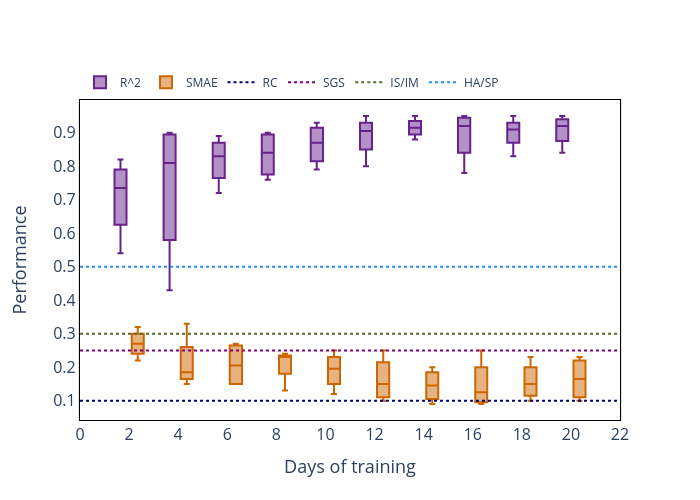

In [537]:
import chart_studio
fig = go.Figure() 
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 3, 2, 3, 1])
# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=RF_P,
    x=x,
    name='R^2',
    marker_color='#68228B',
    showlegend=True
   
))


fig.add_trace(go.Box(
  
    #defining y axis in corresponding
   # to x-axis
    y=RF_R,
    x=x,
    name='SMAE',
    marker_color='#CD6600',
    showlegend=True
   
))
#fig.add_trace(go.Box(
   #y=ANN_R,
    #x=x,
    #name='XGBoost(NMAE)',
    #marker_color='deeppink',
    #showlegend=True

#))
fig.add_trace(go.Scatter(x=X,
                y=Reg, 
                name="RC",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'navy', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Spatial, 
                name="SGS",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'purple', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                    
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Intervention, 
                name="IS/IM",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'darkolivegreen', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Hs_and_sp, 
                name="HA/SP",
                    
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'dodgerblue', dash = 'dot'),
                connectgaps = True,
                showlegend=True
               
                        ))

  
fig.update_layout(autosize=True,
                 #title={'text': "<b>CO Monthly Calibration Scheme </b>",
        #'y':0.84,
        #'x':0.4,
        #'xanchor': 'center',
        #'yanchor': 'top'}, 
    width=600,
    height=450,
                  
  legend=dict( yanchor="bottom",
    y=1.01,
    x=0,
    orientation="h"
),
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                  plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(title_text="Days of training",tickfont = dict(size=16),
                 titlefont = dict(size=18),linewidth=1.1, linecolor='black',tick0 = 2,
        dtick = 2,
                 mirror=True)
fig.update_yaxes(title_text="Performance",tickfont = dict(size=16),
                 titlefont = dict(size=18),linewidth=1.1, linecolor='black',tick0 = 0.1,
        dtick = 0.1,
                 mirror=True)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')

In [538]:
import numpy as np 
import pandas as pd 
import plotly.express as px

x=[2,4,6,8,10,12,14,16,18,20]
data=[[x[i],Rmse1_rf[i]] for i in range(len(x))]
df=pd.DataFrame(data=data, columns=['Day','Oct'])

In [539]:
fig = px.scatter(df, y="Oct", x="Day")
fig.update_traces(marker_size=10)

Metric1=['RF' for i in range(len(RF))]
Metric2=['XGBoost' for i in range(len(ANN))]
Model=Metric1+Metric2
Training=x+x
Values=RF+ANN
len(Values)

#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['RF' for i in range(len(RF))]
Metric2=['XGBoost' for i in range(len(ANN))]
Model=Metric1+Metric2
Training=x+x
Values=RF+ANN
lst=[[Training[i],Values[i],Model[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Training Days', 'Pearson correlation (r)','Model'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Pearson correlation (r)", x="Training Days", color='Model', box=True,
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=900,
    height=500)
fig.show()
#chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
#chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
#Image('models_violinplots.png')

# Seasonal Calibration Scheme

# Fall

# RF

In [540]:
frame1=[data_oct,data_nov]
fall=pd.concat(frame1)
fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall=fall.resample('h').mean()
Fall=Fall.dropna()
X=fall[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=fall['Ref']
X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Fall['Ref']
X_Train=X[:X.shape[0]-200]
X_Test=X[X.shape[0]-200:]
y_Train=y[:X.shape[0]-200]
y_Test=y[X.shape[0]-200:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.002)
X_test=X_Test
y_test=y_Test
mean1=np.std(y)
Rmse7_rf=[]
RMSE7_rf=[]
for i in range(1,11):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse7_rf.append(mse)
    RMSE7_rf.append(rmse)

In [541]:
Rmse7_rf

[0.19, 0.18, 0.17, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16]

In [542]:
RMSE7_rf

[0.8, 0.84, 0.87, 0.88, 0.9, 0.9, 0.89, 0.89, 0.9, 0.9]

# XGBoost

Rmse7_ann=[]
RMSE7_ann=[]
for i in range(1,11):
    model.fit(X_train[:120*i], y_train[:120*i])
    pred=model.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse7_ann.append(mse)
    RMSE7_ann.append(rmse)

# Winter

# RF

In [543]:
frame1=[data_dec,data_jan,data_feb]
winter=pd.concat(frame1)
winter=winter.sample(frac=1)
Winter=winter.resample('h').mean()
Winter=Winter.dropna()
winter=winter.sample(frac=1)
X=winter[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=winter['Ref']
X=Winter[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Winter['Ref']
X_Train=X[:X.shape[0]-200]
X_Test=X[X.shape[0]-200:]
y_Train=y[:X.shape[0]-200]
y_Test=y[X.shape[0]-200:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.002)
X_test=X_Test
y_test=y_Test
mean2=np.std(y)
Rmse8_rf=[]
RMSE8_rf=[]
for i in range(1,11):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse8_rf.append(mse)
    RMSE8_rf.append(rmse)

In [544]:
Rmse8_rf

[0.26, 0.26, 0.26, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

In [545]:
RMSE8_rf

[0.62, 0.64, 0.64, 0.67, 0.68, 0.68, 0.68, 0.68, 0.68, 0.69]

# XGBoost

Rmse8_ann=[]
RMSE8_ann=[]
for i in range(1,11):
    model.fit(X_train[:120*i], y_train[:120*i])
    pred=model.predict(X_test)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y_test, pred), 2)
    Rmse8_ann.append(mse)
    RMSE8_ann.append(rmse)

# Spring

# RF

In [546]:
frame1=[data_mar,data_apr]
spring=pd.concat(frame1)
Spring=spring.resample('h').mean()
Spring=Spring.dropna()
spring=spring.sample(frac=1)
X=spring[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=spring['Ref']
X=Spring[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Spring['Ref']
X_Train=X[:X.shape[0]-200]
X_Test=X[X.shape[0]-200:]
y_Train=y[:X.shape[0]-200]
y_Test=y[X.shape[0]-200:]
X_train, X_test, y_train, y_test=train_test_split(X_Train,y_Train,test_size=0.002)
X_test=X_Test
y_test=y_Test
mean3=np.std(y)
Rmse9_rf=[]
RMSE9_rf=[]
for i in range(1,11):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y, pred),2)
    rmse=round(sm.r2_score(y, pred), 2)
    Rmse9_rf.append(mse)
    RMSE9_rf.append(rmse)

In [547]:
Rmse9_rf

[0.28, 0.21, 0.15, 0.12, 0.1, 0.07, 0.06, 0.06, 0.06, 0.06]

In [548]:
RMSE9_rf

[0.63, 0.78, 0.88, 0.91, 0.93, 0.95, 0.96, 0.96, 0.96, 0.96]

# XGBoost

Rmse9_ann=[]
RMSE9_ann=[]
for i in range(1,11):
    model.fit(X_train[:120*i], y_train[:120*i])
    pred=model.predict(X)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    rmse=round(sm.r2_score(y, pred), 2)
    Rmse9_ann.append(mse)
    RMSE9_ann.append(rmse)

fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(Day,Rmse7_rf,color='teal',linewidth=5)
plt.plot(Day,Rmse8_rf,color='salmon',linewidth=5)
plt.plot(Day,Rmse9_rf,color='lime',linewidth=5)

plt.legend(['Fall', 'Winter','Spring'], 
           loc = 2, bbox_to_anchor = (0.885,1))

plt.xlabel('Days of training',fontsize=18)
plt.ylabel('RMSE(ppm)',fontsize=18)
plt.title('Random Forest(RF) Seasonal Calibration Scheme using CO data(Unshuffled)',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)

fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(Day,Rmse7_ann,color='teal',linewidth=5)
plt.plot(Day,Rmse8_ann,color='salmon',linewidth=5)
plt.plot(Day,Rmse9_ann,color='lime',linewidth=5)

plt.legend(['Fall', 'Winter','Spring'], 
           loc = 2, bbox_to_anchor = (0.885,1))

plt.xlabel('Days of training',fontsize=18)
plt.ylabel('Pearson Correlation (r)',fontsize=18)
plt.title('XGBoost Seasonal Calibration Scheme using CO data (Shuffled)',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)

In [549]:
#import chart_studio
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

Day_1_rf=[RMSE7_rf[0],RMSE8_rf[0],RMSE9_rf[0]]
Day_2_rf=[RMSE7_rf[1],RMSE8_rf[1],RMSE9_rf[1]]
Day_3_rf=[RMSE7_rf[2],RMSE8_rf[2],RMSE9_rf[2]]
Day_4_rf=[RMSE7_rf[3],RMSE8_rf[3],RMSE9_rf[3]]
Day_5_rf=[RMSE7_rf[4],RMSE8_rf[4],RMSE9_rf[4]]
Day_6_rf=[RMSE7_rf[5],RMSE8_rf[5],RMSE9_rf[5]]
Day_7_rf=[RMSE7_rf[6],RMSE8_rf[6],RMSE9_rf[6]]
Day_8_rf=[RMSE7_rf[7],RMSE8_rf[7],RMSE9_rf[7]]
Day_9_rf=[RMSE7_rf[8],RMSE8_rf[8],RMSE9_rf[8]]
Day_10_rf=[RMSE7_rf[9],RMSE8_rf[9],RMSE9_rf[9]]




Day_1_ann=[RMSE7_ann[0],RMSE8_ann[0],RMSE9_ann[0]]
Day_2_ann=[RMSE7_ann[1],RMSE8_ann[1],RMSE9_ann[1]]
Day_3_ann=[RMSE7_ann[2],RMSE8_ann[2],RMSE9_ann[2]]
Day_4_ann=[RMSE7_ann[3],RMSE8_ann[3],RMSE9_ann[3]]
Day_5_ann=[RMSE7_ann[4],RMSE8_ann[4],RMSE9_ann[4]]
Day_6_ann=[RMSE7_ann[5],RMSE8_ann[5],RMSE9_ann[5]]
Day_7_ann=[RMSE7_ann[6],RMSE8_ann[6],RMSE9_ann[6]]
Day_8_ann=[RMSE7_ann[7],RMSE8_ann[7],RMSE9_ann[7]]
Day_9_ann=[RMSE7_ann[8],RMSE8_ann[8],RMSE9_ann[8]]
Day_10_ann=[RMSE7_ann[9],RMSE8_ann[9],RMSE9_ann[9]]

In [550]:
Day_1_RF=[Rmse7_rf[0],Rmse8_rf[0],Rmse9_rf[0]]
Day_2_RF=[Rmse7_rf[1],Rmse8_rf[1],Rmse9_rf[1]]
Day_3_RF=[Rmse7_rf[2],Rmse8_rf[2],Rmse9_rf[2]]
Day_4_RF=[Rmse7_rf[3],Rmse8_rf[3],Rmse9_rf[3]]
Day_5_RF=[Rmse7_rf[4],Rmse8_rf[4],Rmse9_rf[4]]
Day_6_RF=[Rmse7_rf[5],Rmse8_rf[5],Rmse9_rf[5]]
Day_7_RF=[Rmse7_rf[6],Rmse8_rf[6],Rmse9_rf[6]]
Day_8_RF=[Rmse7_rf[7],Rmse8_rf[7],Rmse9_rf[7]]
Day_9_RF=[Rmse7_rf[8],Rmse8_rf[8],Rmse9_rf[8]]
Day_10_RF=[Rmse7_rf[9],Rmse8_rf[9],Rmse9_rf[9]]



Day_1_ANN=[Rmse7_ann[0],Rmse8_ann[0],Rmse9_ann[0]]
Day_2_ANN=[Rmse7_ann[1],Rmse8_ann[1],Rmse9_ann[1]]
Day_3_ANN=[Rmse7_ann[2],Rmse8_ann[2],Rmse9_ann[2]]
Day_4_ANN=[Rmse7_ann[3],Rmse8_ann[3],Rmse9_ann[3]]
Day_5_ANN=[Rmse7_ann[4],Rmse8_ann[4],Rmse9_ann[4]]
Day_6_ANN=[Rmse7_ann[5],Rmse8_ann[5],Rmse9_ann[5]]
Day_7_ANN=[Rmse7_ann[6],Rmse8_ann[6],Rmse9_ann[6]]
Day_8_ANN=[Rmse7_ann[7],Rmse8_ann[7],Rmse9_ann[7]]
Day_9_ANN=[Rmse7_ann[8],Rmse8_ann[8],Rmse9_ann[8]]
Day_10_ANN=[Rmse7_ann[9],Rmse8_ann[9],Rmse9_ann[9]]


In [551]:
RF_P=Day_1_rf+Day_2_rf+Day_3_rf+Day_4_rf+Day_5_rf+Day_6_rf+Day_7_rf+Day_8_rf+Day_9_rf+Day_10_rf
#XGBoost_P=Day_1_ann+Day_2_ann+Day_3_ann+Day_4_ann+Day_5_ann+Day_6_ann+Day_7_ann+Day_8_ann+Day_9_ann+Day_10_ann
RF_R=Day_1_RF+Day_2_RF+Day_3_RF+Day_4_RF+Day_5_RF+Day_6_RF+Day_7_RF+Day_8_RF+Day_9_RF+Day_10_RF
#XGBoost_R=Day_1_ANN+Day_2_ANN+Day_3_ANN+Day_4_ANN+Day_5_ANN+Day_6_ANN+Day_7_ANN+Day_8_ANN+Day_9_ANN+Day_10_ANN
x0=['0' for i in range(3)]
x1=['5' for i in range(3)]
x2=['10' for i in range(3)]
x3=['15' for i in range(3)]
x4=['20' for i in range(3)]
x5=['25' for i in range(3)]
x6=['30' for i in range(3)]
x7=['35' for i in range(3)]
x8=['40' for i in range(3)]
x9=['45' for i in range(3)]
x10=['50' for i in range(3)]
x11=['55' for i in range(3)]
Reg=[0.1 for i in range(36)]
Spatial=[0.25 for i in range(36) ]
Intervention=[0.3 for i in range(36) ]
Hs_and_sp=[0.5 for i in range(36) ]


x=x1+x2+x3+x4+x5+x6+x7+x8+x9+x10
X=x0+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11

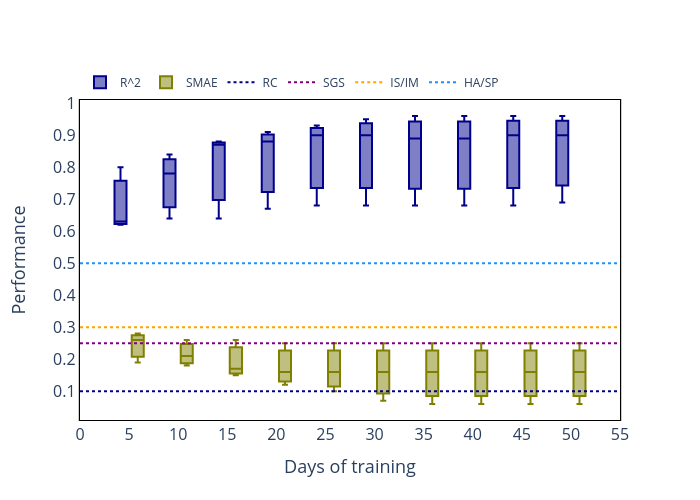

In [552]:
import chart_studio
fig = go.Figure() 
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 3, 2, 3, 1])
# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=RF_P,
    x=x,
    name='R^2',
    marker_color='darkblue',
    showlegend=True
   
))
#fig.add_trace(go.Box(
   # y=ANN_P,
   #x=x,
    #name='XGBoost(R^2)',
    #marker_color='hotpink',
    #showlegend=True

#))

fig.add_trace(go.Box(
  
    #defining y axis in corresponding
   # to x-axis
    y=RF_R,
    x=x,
    name='SMAE',
    marker_color='olive',
    showlegend=True
   
))
#fig.add_trace(go.Box(
   #y=ANN_R,
    #x=x,
    #name='XGBoost(NMAE)',
    #marker_color='orangered',
    #showlegend=True

#))
fig.add_trace(go.Scatter(x=X,
                y=Reg, 
                name="RC",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'navy', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Spatial, 
                name="SGS",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'purple', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                    
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Intervention, 
                name="IS/IM",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'orange', dash = 'dot'),
                connectgaps = True,
                showlegend=True
                
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Hs_and_sp, 
                name="HA/SP",
                    
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'dodgerblue', dash = 'dot'),
                connectgaps = True,
                showlegend=True
               
                        ))

  
fig.update_layout(autosize=True,
                 #title={'text': "<b>CO Monthly Calibration Scheme </b>",
        #'y':0.84,
        #'x':0.4,
        #'xanchor': 'center',
        #'yanchor': 'top'}, 
    width=600,
    height=450,
                  
  legend=dict( yanchor="bottom",
    y=1.01,
    x=0,
    
    orientation="h"
),
             
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                  plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(title_text="Days of training",tickfont = dict(size=16),
                 titlefont = dict(size=18),linewidth=1.1, linecolor='black',tick0 = 5,
        dtick = 5,mirror=True)
fig.update_yaxes(title_text="Performance",tickfont = dict(size=16),titlefont = dict(size=18),
                 linewidth=1.2, linecolor='black',tick0 = 0.1,
        dtick = 0.1,mirror=True)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')